# Рубежный контроль №1

Никулин Данила ИУ5-61Б Вариант 10

Для студентов групп ИУ5-61Б, ИУ5Ц-81Б - для пары произвольных колонок данных построить график "Диаграмма рассеяния".

Задача №2.

Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?


Набор данных №2

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine




In [13]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

In [14]:
data = load_wine()

In [15]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [16]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [17]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

In [18]:
df['target'] = data.target

In [19]:
# Создадим категориальный признак на основе числового
df['category'] = pd.cut(df['alcohol'], bins=3, labels=['low', 'medium', 'high'])

In [20]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
category                        0
dtype: int64

In [21]:
# Добавим пропуски
df.loc[df.sample(frac=0.1).index, 'alcohol'] = np.nan
df.loc[df.sample(frac=0.1).index, 'category'] = np.nan

In [22]:
# Заменим пропуски в количественном признаке медианным значением
df['alcohol'].fillna(df['alcohol'].median(), inplace=True)

# Заменим пропуски в категориальном признаке наиболее часто встречающимся значением
df['category'].fillna(df['category'].mode()[0], inplace=True)

In [23]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
category                        0
dtype: int64

Диаграмма рассеивания

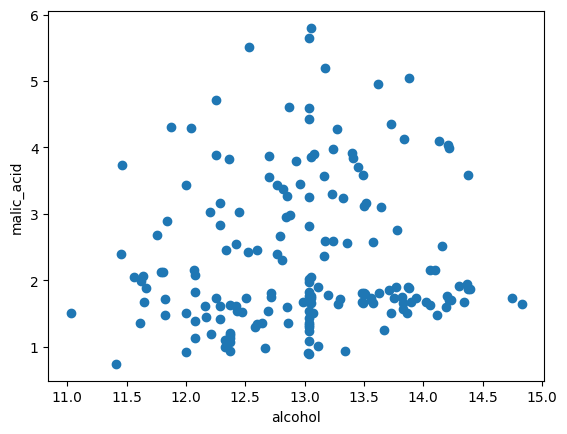

In [24]:
import matplotlib.pyplot as plt

# Выберем две колонки
col1 = 'alcohol'
col2 = 'malic_acid'

# Построим диаграмму рассеяния
plt.scatter(df[col1], df[col2])
plt.xlabel(col1)
plt.ylabel(col2)
plt.show()


Вывод:

Для количественного признака 'alcohol' я использовал метод замены пропусков медианным значением. Этот метод является одним из наиболее распространенных для обработки пропусков в числовых данных, так как медиана минимизирует влияние выбросов и сохраняет распределение данных.

Для категориального признака 'category' была использована замена пропусков наиболее часто встречающимся значением, так как он сохраняет структуру данных и не вносит искусственных значений, которые могут исказить результаты анализа.

Для дальнейшего построения моделей машинного обучения можно использовать целевую переменную 'target' и созданный категориальный признак 'category', а также другие количественные признаки, такие как 'alcohol' и 'malic_acid', которые, имеют влияние на качество вина. Эти признаки могут быть использованы для создания моделей, способных предсказывать классификацию вин на основе их химических свойств.